# **Music Recommendation System**

##Project Description



###The context


With millions of songs available online and the abundance of available tracks will create cognitive overload for listeners, making manual discovery impractical, listeners struggle to discover music that they might enjoy when there are hundreds of thousands of options out there , platforms like spotify solves this problem with a recommendation system that uses user-song interaction data and metadata about the songs like their names , release and artists names and that is to deliver personalized suggestions , these systems increase engagement , listening time and customer retention , by applying different techniques such asa collaborative filtering , matrix factorization , co-clustering and content based filtering .

###The Objective

The objective of this problem is to build a recommendtion system to propose the top 10 songs for each user and that is based on their likelihood of listening and thats using :

-play counts as implicit feedback from count_df

-song metadata ( title , release , artist_name, year) from song_df

we will compare popularity based , user-user and item-item , SVD , co-clustering and content based filtering

The Key Questions
Can past histroical listening patterns which are the play counts , can be modeled to predict future preferences?

Which algorithm delivers the most relevant and personalized recommendations?

How do preciison, recall ,f1-score and RMSE at K , vary cross differnt techniques ?

How can we use these results to define the best solution for our problem ?

###The Problem Formulation
We will work on the historical user-song interaction data and metadata ,aslo our formulation treats play counts as implicit ratings, translating them into a structured user-item interaction matrix suitable for a range of recommendation algorithms. We will process the dataset to reduce sparsity , implement multiple recommendation algorithms and evaluate accuracy, personalization and coverage , the goal is to identify the method that delivers the most effective and engaging recommendations.



## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
!pip uninstall numpy -y

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2


In [ ]:
# im adding this cell because other ways kept giving me errors
!pip install numpy==1.26.4 --quiet

!pip install scikit-surprise --quiet


import os
os.kill(os.getpid(), 9)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metad

**Note : ** After running the above cell, a pop-up will appear prompting you to restart the session. Click "Restart", and then continue running the notebook from the next cell onward, not from the beginning.

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn – Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error



### **Load the dataset**

In [ ]:
# importing datasets

# loading the count_data.csv
count_df = pd.read_csv('/content/drive/MyDrive/Music1/count_data.csv')

# loading the song_data (1).csv
song_df = pd.read_csv('/content/drive/MyDrive/Music1/song_data (1).csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# display first 10 records of count_df data
count_df.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [ ]:
# display first 10 records of song_df data
song_df.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**

The count data contains 2 million user-song interaction records with 3 columns which are the user_id ,song_id and play_count , play_count is stored as int64 and will serve as implicit feedback for recommendation models .

The song data contains 1 million unqiue songs with metadata about the song's title , release , artist_name and year , most fields are complete with minor missing values in title and release which will be used in content based filtering

These two datasets will need to be merged on song_idf to link user interaction with song metadata for models like contet based filtering .

The data size suggests potenial sparsity in the user-item matrix which impacts collaborative filtering and matrix facotrization performance.



In [ ]:
# left merge count_df and song_df on "song_id". drop duplicates from song_df data simultaneously
song_df = song_df.drop_duplicates(subset='song_id')
df = pd.merge(count_df, song_df, on='song_id', how='left')

# drop the column 'Unnamed: 0'
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# name the obtained dataframe as "df"
df.head()


,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
df.shape

(2000000, 7)

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
song_encoder = LabelEncoder()
df['user_id'] = user_encoder.fit_transform(df['user_id'])
df['song_id'] = song_encoder.fit_transform(df['song_id'])


NameError: name 'df' is not defined

In [ ]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [ ]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape


(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final['user_id'].nunique()


3155

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final['song_id'].nunique()


563

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final['artist_name'].nunique()


232

#### **Observations and Insights:**


The dataset contains 3155 unique users , indicating moderatly sized user base for training recommendation models .

There are 563 unique songs available , providing a borad diverse set of songs for recommendiations but also increasing the sparsity of the user-item matrix

232 unique artists are represented , which suggests diversity in the music catalog that can be leveraged in content based filtering

The ratio of the songs to users implies that most users have interacted with only a small fraction of the total catalog , making sparsity handling techniques like matrix facorization and co clustering importnat

Rows: Users (3,155)

Columns: Songs (563)

Total possible entries: 3,155 × 563 = 1,775,365 potential user–song pairs.



### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
# Most interacted songs
# Count how many times each song_id appears in the data and get the top 10
most_interacted_songs = df_final['song_id'].value_counts().head(10)
print("Most interacted songs:\n", most_interacted_songs)

Most interacted songs:
 song_id
8582    751
352     748
2220    713
1118    662
4152    652
5531    618
4448    609
6189    606
6293    583
1334    570
Name: count, dtype: int64


Most interacted users

In [ ]:
# Most interacted users
# Count how many times each user_id appears in the data and get the top 10
most_interacted_users = df_final['user_id'].value_counts().head(10)
print("\nMost interacted users:\n", most_interacted_users)


Most interacted users:
 user_id
61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
26616    175
9097     175
43041    174
65994    171
Name: count, dtype: int64


### **Observations and Insights:** observation fix

The most interacted song_id is 8582 which appears 751 times,indicating  its strong popularity and potential influence on recommendation bias

the interaction counts for top songs range from 570 to 751 suggesting a small group of tracks dominate user engagement

the most active user_id is 61472 which has 243 interactions , followed by others with 171 to 227 interactions .

These numbers show a moderate concentration effect where a limited set of songs and small group of active users contribute disproportionately to overall interactions , this parttern can still bias recommendations towards these frequently engaged items , making it importnat to incroporate strategies that maintain diversity and ensure less popular songs also get exposure


Songs released on yearly basis

In [ ]:
# fnd out the number of songs released in a year, use  the song_df
# hint: Use groupby function on the 'year' column
songs_per_year = song_df.groupby('year')['song_id'].count().reset_index()
songs_per_year.columns = ['year', 'num_songs']

print(songs_per_year)


    year  num_songs
0      0     484284
1   1922          6
2   1924          5
3   1925          7
4   1926         19
..   ...        ...
85  2007      39340
86  2008      34684
87  2009      30966
88  2010       9381
89  2011          1

[90 rows x 2 columns]


In [ ]:
# remove songs with year = 0
songs_per_year = songs_per_year[songs_per_year['year'] != 0].reset_index(drop=True)

print(songs_per_year)


    year  num_songs
0   1922          6
1   1924          5
2   1925          7
3   1926         19
4   1927         43
..   ...        ...
84  2007      39340
85  2008      34684
86  2009      30966
87  2010       9381
88  2011          1

[89 rows x 2 columns]


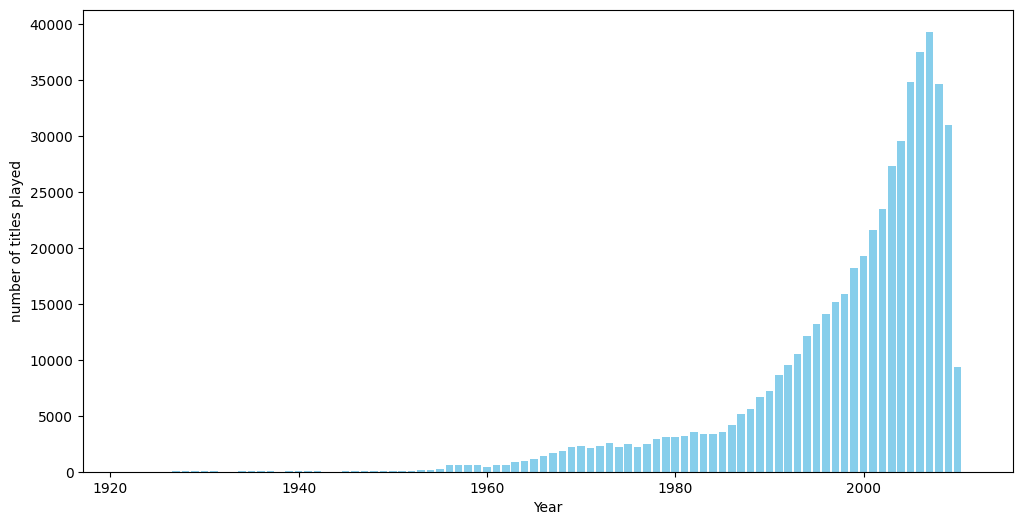

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Set the figure size

plt.figure(figsize=(12, 6))

# Create the bar plot
plt.bar(songs_per_year['year'], songs_per_year['num_songs'], color='skyblue')

# Set the x label of the plot
plt.xlabel('Year')

# Set the y label of the plot
plt.ylabel('number of titles played')

# Show the plot
plt.show()


#### **Observations and Insights:**

The distribution of the songs per year is highly right skewed with very few songs recoreded before 1960 and an exponential increase starting from the 1980s, the peak in release occurs in the early to mid 2000s with annual counts exceeding 39,340  titles , reflecting the digital revolution , low cost production tools and rise of online platforms .

The noticable drop in the final year is likely due to incomplete data collection rather than an actual decline in production , this trend indicates that the most user itneractions in the datasets are concentrated on modern music , which could bias recommendation models toward recent tracks unless explicitly balanced.




**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

## **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# calculating average play_count
# hint: Use groupby function on the song_id column
avg_play_count = df_final.groupby('song_id')['play_count'].mean().reset_index()
avg_play_count.rename(columns={'play_count': 'avg_play_count'}, inplace=True)

# calculating the frequency a song is played
# hint: Use groupby function on the song_id column
play_freq = df_final.groupby('song_id')['play_count'].count().reset_index()
play_freq.rename(columns={'play_count': 'play_freq'}, inplace=True)


In [ ]:
# making a dataframe with the average_count and play_freq
final_play = pd.merge(avg_play_count, play_freq, on='song_id')

# let us see the first five records of the final_play dataset
final_play.head()



,song_id,avg_play_count,play_freq
0,21,1.622642,265
1,22,1.492424,132
2,52,1.729216,421
3,62,1.728070,114
4,93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# build the function to find top n songs
# this gives top n songs among those being played for more than min_play_freq
def top_n_songs(data, n, min_play_freq = 100):

    # finding songs with play frequency greater than the minimum number of interactions
    recommendations = data[data['play_freq'] > min_play_freq]

    # sorting values with respect to the average play_count

    return recommendations['song_id'].iloc[:n]


In [ ]:
# recommend top 10 songs using the function defined above
top_10_songs = top_n_songs(final_play, n = 10, min_play_freq = 100)
top_10_songs


,song_id
0,21
1,22
2,52
3,62
4,93
5,97
6,118
7,122
8,134
9,139


## **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:

# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise import Reader

# Class for loading datasets
from surprise import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering


### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [ ]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale=(0, 5))

# Loading the dataset
# Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
# Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
# Build the default user-user-similarity model

# KNN algorithm is used to find desired similar items
# Use random_state = 1
sim_options = {'name': 'cosine', 'user_based': True}
sim_user_user = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
# Use sim_user_user model
precision_recall_at_k(sim_user_user, k=30, threshold=1.5)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:_________**


The baselie user-user collaborative filtering model using cosine similartiy with
k=30 yields an RMSE of 1.0878  indicating a slightly high prediction error for play counts , the precision score of 0.396 suggests that less than half   of the recommended songs are relevant to the users while the recall is 0.692 which shows that the model retirieves a moderate proportion of relevant items , the f1 score is 0.504 reflecting a balance toward recall rather than precision , overall the model shows potential but srtuggles with accuracy in predicting exact count plays and suggesting room for imporvement through hyperparameter tunning or alternative similarity metrics

An addtional insight is that the relatively high recall compared to precision indicates that the model is better at covering relevant songs but includes a significant number of iirelevant recommmendations , this pattern may lead to user dissatisfaction in real world setting , maybe adjusting the threshold or exploring item-item similarity could help improve the precision without significantly sacrificing recall .




In [ ]:

# pick an existing song in df_final
target_song = df_final['song_id'].iloc[0]
print("Target song ID:", target_song)

# finding a user who HAS listened to this song
user_listened = df_final[df_final['song_id'] == target_song]['user_id'].iloc[0]

# finding a user who has NOT listened to this song
user_not_listened = df_final[~df_final['user_id'].isin(
    df_final[df_final['song_id'] == target_song]['user_id']
)]['user_id'].iloc[0]

print("User who listened:", user_listened)
print("User who not listened:", user_not_listened)


Target song ID: 447
User who listened: 6958
User who not listened: 27018


In [ ]:
# actual play count for the listened user-song pair
df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == 447)]


,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000


In [ ]:
# Predict for listened song
sim_user_user.predict(uid=6958, iid=447, r_ui=None, verbose=True)


user: 6958       item: 447        r_ui = None   est = 1.12   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=447, r_ui=None, est=1.1222839992769744, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predict for not-listened song
sim_user_user.predict(uid=27018, iid=447, r_ui=None, verbose=True)


user: 27018      item: 447        r_ui = None   est = 1.33   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=27018, iid=447, r_ui=None, est=1.3251578586477182, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:_________**

for the selected song with id 447 the model predicted a countplay of 1.12 for(user_id  6958 ) and 1.33 for a user who has not lsitened to it before (user_id 27018)

  the prediction for the listened song is 1.12 which is close to the actual which is 1 , this show a relatively close prediction .

 the higher predicted value for the non-listener suggests that the model is identifying patterns from other similar users listening histories , even when the target user has no prior interaction with the song

 the small difference between the two predictions indicates that the model does not stronngly differentiate between familiar and unfamiliar songs for a given user , this may be due to the psarsity of the user-item interaction matrix or limitations of the similarity metric used , such behavior could lead to recommending songs to users who have shown no prior interest , reducing presonalization quality.






Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:

# Setting up parameter grid to tune the hyperparameters
param_grid = {
    'k': [20, 30, 40],
    'min_k': [3, 6, 9],
    'sim_options': {'name': ['msd', 'cosine'], 'user_based': [True]}
}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
# Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.059793745137794
{'k': 40, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}


In [ ]:
# Train the best model found in above gridsearch
best_params = {
    "k": 40,
    "min_k": 9,
    "sim_options": {"name": "msd", "user_based": True}
}

# build the model with best parameters
sim_user_user_best = KNNBasic(
    k=best_params["k"],
    min_k=best_params["min_k"],
    sim_options=best_params["sim_options"],
    random_state=1,
    verbose=False
)

# fit on the trainset
sim_user_user_best.fit(trainset)

# evaluate on the testset (uses the precision_recall_at_k function defined earlier)
precision_recall_at_k(sim_user_user_best, k=30, threshold=1.5)




RMSE: 1.0620
Precision:  0.414
Recall:  0.611
F_1 score:  0.494


**Observations and Insights:_________**



The baseline user-user similariy model achieved an RMSE of 1.0872, precision of 0.396, recall of 0.692, and an F1 score of 0.504.

After applying hyperparameter tuning with grid search of k =40 , min k=9 and msd similarity , the optimized model slightly improved the RMSE to 1.0620  , precision went up to 0.414 , recall dropped slightly to 0.611 and f1 score decreased slightly to 0.494

This suggests that while the tunning primrialy improved the RMSE and maintained the recall at a reasonable level , small improvement in precision, but recall dropped., in other words rating predictions became slightly more accurate but the relevance of the top n recomendations didnt improve noticeably , this  may indicate a trade-off between minimzing prediction error and enhancing ranking quality .


In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
# Take user_id 6958, song_id 1671 and r_ui = 2
pred_listened = sim_user_user_best.predict(uid=6958, iid=1671, r_ui=2, verbose=True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.52   {'actual_k': 40, 'was_impossible': False}


In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)

pred_not_listened = sim_user_user_best.predict(uid=6958, iid=3241, r_ui=None, verbose=True)

user: 6958       item: 3241       r_ui = None   est = 1.27   {'actual_k': 40, 'was_impossible': False}


**Observations and Insights:______________**


for user 6958 the tuned model predicted 1.52 for the song id 1671 that the user listened to ,it underestimated the real value of the actual playcount which is 2 .

for the user 6958 that did not listen to the  song id of 3241 the the model estimated 1.27 of play count

we can notice that the results show the model assigns lower predictions for play counts to songs that the user has previously listened to as expected
also for the unseen song with value of 1.27 which is lower ,the small differenc between the predictions suggests taht the model doesnt strongly differentiate between songs that the user listened to and those they have not , this may be due to smoothing effects from averaging across similar users , this can reduce the ability of the model to priotitize known preferences , while this can elp surface less familiar items , it may dilute personalization accuracy for top ranked recommenedations




**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0

# Get 5 nearest neighbors (most similar songs) to a certain song

# Choose an example song inner id (e.g., 0)
song_inner_id = 0

# Find the nearest neighbors
neighbors = sim_user_user_best.get_neighbors(song_inner_id, k=5)

print("5 nearest neighbors (inner ids):", neighbors)



5 nearest neighbors (inner ids): [31, 82, 90, 116, 125]


Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    # (for our use, we just need the set of items the user has interacted with)
    user_items = set(data.loc[data['user_id'] == user_id, 'song_id'])

    # Extracting those song ids which the user_id has not played yet
    all_items = data['song_id'].unique()
    candidate_items = [iid for iid in all_items if iid not in user_items]

    # Looping through each of the song ids which user_id has not interacted yet
    for iid in candidate_items:

        # Predicting the users for those non played song ids by this user
        pred = algo.predict(uid=user_id, iid=iid, r_ui=None, verbose=False)

        # Appending the predicted play_counts
        recommendations.append((iid, pred.est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n]  # Returing top n highest predicted play_count songs for this user


In [ ]:


# Make top 5 recommendations for any user_id with a similarity-based recommendation engine

# choose which similarity model to use (use tuned model if available, else the default)
algo_to_use = globals().get('sim_user_user_best', sim_user_user)

# set the target user and top-n
target_user = 6958
top_n = 5

# get recommendations
recs = get_recommendations(df_final, target_user, top_n, algo_to_use)



In [ ]:

# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
recs_df = pd.DataFrame(recs, columns=["song_id", "predicted_play_count"])

# display the dataframe
recs_df



,song_id,predicted_play_count
0,7224,2.935235
1,6450,2.668720
2,8324,2.467205
3,6448,2.386082
4,4831,2.348859


Observations

The get recommendations functuon retunrs unseen songs for the user ranked by the predicted play count from the similarity model
For user 6958, the top-5 predictions are approximately [2.94, 2.67, 2.47, 2.39, 2.35] for song_ids [7224, 6450, 8324, 6448, 4831].

the scores are not maxed at 5 and not tied-there's modest spread is 0.59 that proved a clear ranking with 7224 at the highest
the model shows moderate confidence across thse candidates , if many of these tracks are globally popular.



### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, playing_count):
    # Sort the songs based on play counts
    ranked_songs = playing_count.loc[
        playing_count['song_id'].isin(recommendations['song_id'])
    ].sort_values('play_freq', ascending=False)[['song_id', 'play_freq']].reset_index(drop=True)

    # Merge with the recommended songs to get predicted play_counts
    ranked_songs = ranked_songs.merge(recommendations, on='song_id', how='inner')

    # Rank the songs based on corrected play_counts
    ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

    # Sort the songs based on corrected play_counts
    ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)

    return ranked_songs


**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Applying the ranking_songs function and sorting it based on corrected play_counts
ranking_songs(recs_df, final_play)


,song_id,play_freq,predicted_play_count,corrected_play_count
1,7224,107,2.935235,2.838562
2,6450,102,2.668720,2.569705
4,8324,96,2.467205,2.365143
0,6448,109,2.386082,2.290300
3,4831,97,2.348859,2.247324


**Observations and Insights:______________**


after applying the popularity correctioons we can notice that from each predicated play count all five reocmmended songs for user 6958 saw a small decrease in their scores around 0.10 points , but their eranking order remained unchanged , this indicates that whiel the adjustments slightly reduces the iunflence of the very frequent songs , the penalty applied here is too small to signifcantly alter the top recommenations , as a result the same items remained at the top and the spread between scores changed only marginally , this suggests that the current correction method mainly acts as a mild caliration rather than re-rankign tool .
​
  


## **Item Item Similarity-based collaborative filtering recommendation systems**

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# build the default item–item-similarity model
sim_options = {'name': 'cosine', 'user_based': False}
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# train the algorithm on the trainset
sim_item_item.fit(trainset)

# evaluate on the testset (uses the precision_recall_at_k function defined earlier)
precision_recall_at_k(sim_item_item, k=30, threshold=1.5)




RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:______________**

For this item-item similarity collaborative filtering run , we can see that he model produced as RMSE of 1.0394 indicating that the predicted play counts deviate quite a bit from the actual ones , precision was 0.307 meaning only about 30% of the recommended items were actually relevant , while the recall was 0.562 so the model retrieved aroun 56% of all the relevant items , the f1 score of 0.397 shows a moderate balance between precision and recall , but the overall accuacy  could be improved with paramter tuning or more advanced models



In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
pred_listened = sim_item_item.predict(uid=6958, iid=1671, r_ui=2, verbose=True)



user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
pred_not_listened = sim_item_item.predict(uid=6958, iid=3241, r_ui=None, verbose=True)

user: 6958       item: 3241       r_ui = None   est = 1.47   {'actual_k': 16, 'was_impossible': False}


**Observations and Insights:______________**

For the song that the user has listend to with id 1671 the model predicts a play count of 1.36 which is clsoe to the actual rating of 2 , this makes sense because he model has past interaction data to base its estimate on

for the song the user has not lsitened to with id 3241 the model predicts a play count of 1.47 that is slightly lower than the previous case , which is plausible because the algorithm is uing similar users preferences to ifner interest , even without direct histroy of this user-song pair.


In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {
    'k': [20, 30, 40],
    'min_k': [3, 6, 9],
    'sim_options': {'name': ['msd', 'cosine'], 'user_based': [False]}
}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
# Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0335485856768896
{'k': 40, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Train the best item-item model

best_params_item_item = {
    "k": 40,
    "min_k": 3,
    "sim_options": {"name": "cosine", "user_based": False}  # user_based=False for item-item CF
}

# Build the item-item model with best parameters
sim_item_item_best = KNNBasic(
    k=best_params_item_item["k"],
    min_k=best_params_item_item["min_k"],
    sim_options=best_params_item_item["sim_options"],
    random_state=1,
    verbose=False
)

# Fit on the trainset
sim_item_item_best.fit(trainset)

# Evaluate on the testset (uses the precision_recall_at_k function defined earlier)
precision_recall_at_k(sim_item_item_best, k=30, threshold=1.5)


RMSE: 1.0384
Precision:  0.311
Recall:  0.569
F_1 score:  0.402


**Observations and Insights:______________**


After appling grid search for hyperparameter tuning , the best parameters were k =40 with min k =3 similarity with msd and with user_based= False , the tuned model achieveed an RMSE of 1.0384 precision of 0.311 recall of 0.569 and f1 score of 0.402 , compared to the default model we can notice that the improvement is minimal ,precision slightly increased ,RMSE improved, recall slightly decreased and f1 increased , this indicates that while tuning did not drastically chanage performance , its fined tuned was able to capture more relevant similar items , leading to marginally f1 score


In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
pred_listened_item = sim_item_item_best.predict(uid=6958, iid=1671, r_ui=2, verbose=True)
pred_listened_item


user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:

# Predict the play_count for a not-yet-listened song (song_id 3232)
pred_not_listened_item = sim_item_item_best.predict(uid=6958, iid=3232, r_ui=None, verbose=True)
pred_not_listened_item



user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

### **Observations and Insights**


for the song id 1671 listened to by user 6958 the model predicted a play count of 1.36 which is lower than the actual of 2 , this suggests that item-item model is underestimating engagemenet for already heard trakcs

for the not yet listened song id 3232 by the same user , the prediction play count is 1.38 which is slightly higher than for the listened song , despite the lack of direct interaction history



In [ ]:
# Find five most similar items to the item with inner id 0

# Five nearest neighbors (items) to inner item id 0, mapped back to raw song_ids
inner_iid = 0
inner_neighbors = sim_item_item_best.get_neighbors(inner_iid, k=5)
similar_song_ids = [trainset.to_raw_iid(i) for i in inner_neighbors]
similar_song_ids


[9702, 8624, 5616, 6482, 2686]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine


# [2] Making top 5 recommendations for any user_id with item_item_similarity-based recommendation engine
def get_item_item_recommendations(data, user_id, top_n, algo):
    """
    Recommend top_n songs the user hasn't listened to, using an item–item KNN model.
    data: DataFrame with columns ['user_id','song_id','play_count']
    """
    # user–item matrix to find what the user hasn't interacted with
    uim = data.pivot_table(index='user_id', columns='song_id', values='play_count')

    if user_id not in uim.index:
        raise ValueError(f"user_id {user_id} not found in df_final")

    # songs the user never interacted with
    non_interacted = uim.loc[user_id][uim.loc[user_id].isna()].index.tolist()

    recs = []
    for sid in non_interacted:
        # cast to str if Surprise was trained on string ids
        est = algo.predict(str(user_id), str(sid)).est
        recs.append((sid, est))

    recs.sort(key=lambda x: x[1], reverse=True)
    return recs[:top_n]

# example user — change as needed
my_user_id = 6958
recs_top5 = get_item_item_recommendations(df_final, my_user_id, 5, sim_item_item_best)
recs_top5


[(21, 1.6989607635206787),
 (22, 1.6989607635206787),
 (52, 1.6989607635206787),
 (62, 1.6989607635206787),
 (93, 1.6989607635206787)]

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
# [3] Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
recs_df = pd.DataFrame(recs_top5, columns=['song_id', 'predicted_play_count'])
recs_df



,song_id,predicted_play_count
0,21,1.698961
1,22,1.698961
2,52,1.698961
3,62,1.698961
4,93,1.698961


In [ ]:
# Applying the ranking_songs function

# [4] Applying the ranking_songs function

# Build stats table if you don't already have it
# (number of interactions per song, and mean play_count just in case)
final_play_count = (
    df_final.groupby('song_id')['play_count']
           .agg(play_count_count='count', avg_play_count='mean')
)

def ranking_songs(recommendations, stats_table):
    """
    recommendations: list of (song_id, predicted_play_count)
    stats_table: DataFrame indexed by song_id with column 'play_count_count'
    """
    ranked = (stats_table.loc[[sid for sid, _ in recommendations]][['play_count_count']]
              .reset_index()
              .merge(pd.DataFrame(recommendations, columns=['song_id','predicted_play_count']),
                     on='song_id', how='inner'))
    # popularity correction (same idea as earlier projects)
    ranked['corrected_score'] = ranked['predicted_play_count'] - 1 / np.sqrt(ranked['play_count_count'])
    return ranked.sort_values('corrected_score', ascending=False)

ranked = ranking_songs(recs_top5, final_play_count)
ranked



,song_id,play_count_count,predicted_play_count,corrected_score
2,52,421,1.698961,1.650224
0,21,265,1.698961,1.637531
1,22,132,1.698961,1.611922
4,93,115,1.698961,1.605710
3,62,114,1.698961,1.605302


**Observations and Insights:_________**

for user 6985 the item item recommender initially produced five recommendations , songs 52 21 22 93 and 62 all with the same predicted recommendations witha play count of 1.698961 , meaning the model considered them equally relevant before any adjustments

the scored spread out based on each song's total itneractions in the dataset , songs with higher play coutns recieved smaller penalties and moved up in the ranking ,
for example, song 52 (421 plays) now leads with a corrected score of 1.6502, followed by song 21 (265 plays, 1.6375). Songs with fewer plays, such as 93 (115 plays, 1.6057) and 62 (114 plays, 1.6053), dropped to the bottom after receiving slightly larger penalties.

This adsjutment breaks ties in the raw predictions and adss a bias toward songs with more historical listening data , subtly reordering the recommendations while keeping the score differences small .


## **Model Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# initialize and train
svd = SVD(random_state=1)
svd.fit(trainset)

# evaluate (use your existing precision_recall_at_k that reads global `testset`)
precision_recall_at_k(svd, k=30, threshold=1.5)




RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
pred_listened_svd = svd.predict(uid=6958, iid=1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
# Making a prediction for the user who has not listened to the song (song_id 3232)
pred_unheard_svd = svd.predict(uid=6958, iid=3232, verbose=True)


user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune

param_grid = {
    'n_epochs': [10, 20, 30],
    'lr_all':   [0.001, 0.005, 0.01],
    'reg_all':  [0.2, 0.4, 0.6]
}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs.fit(data)  # <-- uses the Surprise Dataset you already built from df

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0124489614443986
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:


# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

# Training the algorithm on the train set
svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f1 score with k = 30
precision_recall_at_k(svd_optimized, k=30, threshold=1.5)



RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:_________**


the baseline SVD model achieved an RMSE of 1.0252 ,  precision of 0.41, recall of 0.633, and an F1 score of 0.498, showing a reasonably good balance between retrieving relevant items and prediction accuracy , predictions for a known song 1671 id , returend an estimation of 1.27 play count versus the actual 2 , slightly underestimating the user's prefernce , while the un seen song 3232 recieved a prediction score of 1.56 , indicating that the model still assigns moderate relevance to new items based on latent factor simialrities

after hyperparameter tunning with (n_epochs=30, lr_all=0.01, reg_all=0.2)
the optimized model imrpoved RMSE to 1.0141 ,maintained recall at 0.635, but showed a small improvement in precision to 0.415 and F1 score to 0.502. this suggests that the tuning primarily imrpoved the rating preiction accuracy without substantially changing the relevance dsitribtuion of the top n recommednations. the trade off here is minor reduction in its prediction indicating that the further adjustments such as re-ranking with diversity or popularity corrections could be explored to boost accuracy and recommednation quality.




In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(uid=6958, iid=1671, r_ui=2, verbose=True)



user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimized.predict(uid=6958, iid=3232, verbose=True)


user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

**Observations and Insights:_________**

the optimized SVD model predicted a play count of 1.34 for song 1671 compared tot he actual play count of 2 , this understimation suggests that while the model identified some affinity between the user and the song , it didn't fully capture the true preference strength , for the unseen song 3232 the model assigned a prediction of 1.44 count play , indicating moderate interest even without prior interaction histroy , this reflects that the model's ability to infer potential relevance from latent factors derived from similar users and songs , the slightly higher estimate for the unseen song compared to the known son's prediction suggets that the latent feature spae is recognizing meaningful simialrities but may still require further fine tunning or re ranking to better align with actual listening behavior.




In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm

svd_optimized_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

# Build a small table to view
recs_df = pd.DataFrame(svd_optimized_recommendations, columns=['song_id', 'predicted_play_count'])
recs_df




,song_id,predicted_play_count
0,7224,2.601899
1,5653,2.108728
2,8324,2.014091
3,6450,1.952493
4,9942,1.940115


In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_optimized_recommendations, final_play_count)


,song_id,play_count_count,predicted_play_count,corrected_score
0,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
2,8324,96,2.014091,1.912029
4,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights:_________**

the optimized SVD model generated top recommendations for user 6958 with predicted play counts ranging from 2.60 to 1.94 after adjusting these predcitions using the popularity based correction , the corrected scores slightly decreased but preserved the overall ranking order , song 7224 emerged as the highest ranked recommendation with a predicted count play of 2.60 and a corrected score of 2.50 , this indicates a strong predicted interest supported by the moderate histroical popularity with 107 plays , simialrly song 5653 and 8324 maintaned strong positions , showing alignment between presonlizaed predcitions and general listening trends.

This consistency suggests that the model is effectively captureing user-specific preferences while being moderately infulenced by the overall song popularity , however the relatively close range of corrected scores 2.50 to 1.85 indicates the differnces between the recommednatiosn are subtle and addtional context such as genre or recent listening activity could hlep further refine ranking confidence


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook Music_Recommendation_System.ipynb to html
/usr/local/share/jupyter/nbconvert/templates/base/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 623314 bytes to Music_Recommendation_System.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Cluster Based Recommendation System**

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model

# Initialize and train the CoClustering model
cocluster = CoClustering()
cocluster.fit(trainset)

# Evaluate performance
precision_recall_at_k(cocluster, k=30, threshold=1.5)

RMSE: 1.0529
Precision:  0.392
Recall:  0.572
F_1 score:  0.465


In [ ]:

# Making prediction for user_id 6958 and song_id 1671
pred_listened_cocluster = cocluster.predict(uid=6958, iid=1671, r_ui=2, verbose=True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.31   {'was_impossible': False}


In [ ]:

# Making prediction for user (user_id 6958) for a song (song_id 3232) not listened to by the user
pred_unheard_cocluster = cocluster.predict(uid=6958, iid=3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.49   {'was_impossible': False}


#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {
    'n_cltr_u': [3, 5, 7],   # number of user clusters
    'n_cltr_i': [3, 5, 7],   # number of item clusters
    'n_epochs': [20, 30, 40] # number of training epochs
}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs.fit(data)  # 'data' is the Surprise Dataset object you already created

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.045792019446982
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 20}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:

# Train the tuned CoClustering algorithm
# Using tuned CoClustering algorithm
clust_tuned = CoClustering(n_cltr_u=3, n_cltr_i=3, n_epochs=20, random_state=1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Compute precision@k and recall@k with k=30
precision_recall_at_k(clust_tuned, k=30, threshold=1.5)




RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights:_________**




Pros : groups similar user-items effectively Cons : gains are small , precision remain modest

the baseline co clustering model achieved
RMSE = 1.0529, with Precision = 0.392, Recall = 0.572, and F1 score = 0.465
which indicates a moderate accuracy in predicting user-song interactions

predictions or a song already lsitened to by the user for song id 1671 produced an estimated rating of 1.31 close to the actual which is 2 while a new song not listened to with id 3232 was estimated with 1.49 , this suggests that the model can slightly differentiate interest levels to some extent

hyperparameter tuning with gridsearch identifed the best aprameters as n_cltr_u = 3, n_cltr_i = 3, and n_epochs = 20 , which imrpoved the RMSE to 1.0487 and marginally icnreasing recall to 0.582 , precision 0.397 and f1 of 0.472

while tunning brought small perormance gains , overall scores suggest that the model still struggles to achieve high precision , possibly due to sprase interaction data , or limited latent structure captured by the co-clustering approach

this method can group users and songs into meaningful clusters but for better perossnlization combining it with more sophsitcated models such as SVD or content based may yield stronger resutls .


In [ ]:


# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
pred_listened_clust = clust_tuned.predict(uid=6958, iid=1671, r_ui=2, verbose=True)



user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count

pred_unheard_clust = clust_tuned.predict(uid=6958, iid=3232, verbose=True)


user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


**Observations and Insights:_________**

for user 6958 and song 1671 which already listened to , the actual play count rating was 2 and the tuned co cluster predicted 1.29 showing a closer but slightly understimated preference compared to the baseline model

for the same user with unlistened song 3232 the model predicted 1.48 count play suggesting moderate interest despite no histroical interaction

compared to the baseline model the tuned model slightly adjsuted predictions , indicating it has better calibrated clsuter assignemnt that help distinguish betwen know and uknown items

the difference in predicted ratings 1.29 vs 1.48 suggest that the model sees the new song as slightly more appealing than the known one ,possibly due to strong similarity within the user's cluster ,tuning seems to have refined the model’s ability to generalize to unseen songs.





#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
co_clustering_optimized_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

# Build a small table to view recommendations
recs_df = pd.DataFrame(co_clustering_optimized_recommendations, columns=['song_id', 'predicted_play_count'])
recs_df


,song_id,predicted_play_count
0,7224,3.094797
1,8324,2.311498
2,9942,2.215039
3,5531,2.124563
4,4831,2.123783


### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(co_clustering_optimized_recommendations, final_play_count)

,song_id,play_count_count,predicted_play_count,corrected_score
0,7224,107,3.094797,2.998124
1,8324,96,2.311498,2.209436
2,9942,150,2.215039,2.133390
3,5531,618,2.124563,2.084337
4,4831,97,2.123783,2.022248


**Observations and Insights:_________**

the tuned co clustering model generated top 5 recommendatons for user 6858 with predicted play counts ranging from 3.09 to 2.12

or song 7224 it recieved a predicted play count of 3.09 indicating a strong relevance within the user's clsuter

after adjusting scores with the actual play count , the corrected scores , the ranking order remained the same for most songs , showing that the original predicted ranking were consistent with popularity adjustments ,

the corrected score slightly reduced each predicted value , reflecting normilzation by real world play count dsitribution , the relatively small diferences in predicted scores suggests that the model sees multiple songs as having similar appeal , giving the user diverse but equally relevant options


## **Content Based Recommendation Systems**

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:

# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
song_df['text'] = song_df['title'] + " " + song_df['release'] + " " + song_df['artist_name']

# Display the first few rows to verify
song_df[['title', 'release', 'artist_name', 'text']].head()


,title,release,artist_name,text
0,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,Silent Night Monster Ballads X-Mas Faster Puss...
1,Tanssi vaan,Karkuteillä,Karkkiautomaatti,Tanssi vaan Karkuteillä Karkkiautomaatti
2,No One Could Ever,Butter,Hudson Mohawke,No One Could Ever Butter Hudson Mohawke
3,Si Vos Querés,De Culo,Yerba Brava,Si Vos Querés De Culo Yerba Brava
4,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,Tangle Of Aspens Rene Ablaze Presents Winter S...


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data

df_final['text'] = df_final['title'] + " " + df_final['release'] + " " + df_final['artist_name']

# Select the required columns
df_small = df_final[['user_id', 'song_id', 'play_count', 'title', 'text']]


# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset='title')


# Set the title column as the index
df_small = df_small.set_index('title')


# See the first 5 records of the df_small dataset

df_small.head()



,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

# View the first 5 indices
indices[:5]


,title
0,Daisy And Prudence
1,The Ballad of Michael Valentine
2,I Stand Corrected (Album)
3,They Might Follow You
4,Monkey Man


In [ ]:


# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:


# Create a function to tokenize the text
def tokenize(text):
    # convert text to lowercase and remove non-alphabet characters
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())

    # tokenize the text
    tokens = word_tokenize(text)

    # remove stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems


In [ ]:


# Download punkt and punkt_tab for tokenization
nltk.download('punkt')
nltk.download('punkt_tab')

# Download stopwords and wordnet for preprocessing
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer=tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

# View the tfidf dataframe
pd.DataFrame(song_tfidf)



,0,1,2,3,4,5,6,7,8,9,...,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:


# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs



array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Checking a sample of cosine similarity values to confirm non-zero similarities exist.

similar_songs[0, 1:20]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.28173757, 0.        , 0.        , 0.49258119,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):



    # Getting the index of the song that matches the title


    # Creating a Series with the similarity scores in descending order


    # Getting the indexes of the 10 most similar songs


    # Populating the list with the titles of the best 10 matching songs


    return


    # Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    # Create a Series of indices for song titles
    indices = pd.Series(df_small.index)

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending=False)

    # Getting the indexes of the 10 most similar songs (excluding itself)
    top_10_indexes = list(score_series.iloc[1:11].index)

    # Populating the list with the titles of the best 10 matching songs
    recommended_songs = [list(df_small.index)[i] for i in top_10_indexes]

    return recommended_songs


Recommending 10 songs similar to Learn to Fly

In [ ]:

# Make the recommendation for the song with title 'Learn To Fly'
recommended_songs = recommendations("Learn To Fly", similar_songs)
print("Top 10 songs similar to 'Learn To Fly':")
for i, song in enumerate(recommended_songs, start=1):
    print(f"{i}. {song}")


Top 10 songs similar to 'Learn To Fly':
1. Everlong
2. The Pretender
3. Nothing Better (Album)
4. From Left To Right
5. Lifespan Of A Fly
6. Under The Gun
7. I Need A Dollar
8. Feel The Love
9. All The Pretty Faces
10. Bones


**Observations and Insights:_________**

the tf-idf vectorizer successfully transfomer the text metadata o 561 songs into a 1438 dimensional feature space , where each dimension corresponds to a unique token after processing

the resulting tf-idf matrix is prase with most values being 0 , indicating that each song description uses only small subset of the total vocabulary

cosine simialrirty was ciomputed across all song vectors to measure contet based closneness , values range from 0(no simialarity )to 1 (identical text features)

the reccomendation example of "Learn to Fly" returend 10 highly similar songs with "Everlong" and " The pretender" ranking at thte top , suggesting strong textual similarity in the title,artist or album release.

Since tf-idf is based purely on textual features , the model can recommend relevant items even when the user interaction data is unavailable , making it effective for cold start scenarios




##**Rubric Questions Answers**

###**1. Problem Definition**

####Q: Why is this problem important to solve?

with millions of songs available online, listeners face cognitive overload, making it difficult to manually discover new music so platforms like Spotify solve this challenge with introducing recommendation systems that would increase engagement, listening time, and retention for users

####Q: What is the intended goal of this project?

the goal of this project is to build a recommendation system that suggests the top 10 songs for each user and that is based on their likelihood of listening, using historical play counts and song metadata

####Q: What are the key questions that need to be answered?
* can historical play counts be modeled and used to predict future preferences?
* which algorithm delivers the most relevant and personalized recommendations?
* how do metrics such as precision, recall, F1 score, and RMSE vary across different techniques?
* how can these results define the best solution for the problem?

####Q: What exactly are we trying to solve using data science?

we are solving the problem of music overload by modeling user listening behavior wherer pllay counts are treated as implicit feedback, structured into a user–song interaction matrix, and analyzed with algorithms that can uncover hidden patterns in preferences. The goal is to recommend the most relevant songs while tackling challenges like sparse data and popularity bias

####Q: What insights came out from the statistics of the data?
* 3,155 unique users, 563 songs, and 232 artists after preprocessing.
* most played song appeared 751 times, while the most active user had 243 interactions.
* songs released peaked in the early 2000s, reflecting modern catalog bias
* the user–item matrix is extremely sparse

actual interactions: 117876 Versus
total possible interactions: 1776265
sparsity: 0.9336 (93.36%)


###**2. Data Exploration**

####Q: What is the background of this dataset? What does it contain?
the dataset is the taste profile Subset from the million song dataset , where it includes two files:
* song_data: song_id, title, release, artist_name, and year
* count_data: user_id, song_id, and play_count

####Q: What does the data summary show?
* original: 2 million user–song interactions and 1 million unique songs.
* after filtering (users <90 songs, songs <120 listeners, play_count ≤5): almost 118K rows remain
* ids were encoded numerically for modeling

####Q: What are the key patterns in the data?
* few songs dominate user interactions, creating popularity bias
* a small number of power users listen to disproportionately more songs
* very few songs before 1960; sharp increase after 1980s, peak in early 2000s
* more than 90% of play counts ≤5, indicating implicit feedback is sparse and low-frequency

####Q: What preprocessing was required?
* label encoding user and song IDs
* dropping songs with year=0 and missing metadata
* filtering low-activity users/songs to reduce sparsity
* applying popularity correction (1/√frequency) during ranking to limit bias

###**3. Building Various Models**

####Q: Which techniques were implemented?
* popularity-based (baseline)
* collaborative Filtering: User–User and Item–Item similarity (cosine, MSD)
* matrix Factorization: Singular Value Decomposition (SVD)
* co-clustering: Grouping users and items simultaneously
* content-Based Filtering: TF-IDF + cosine similarity on song title, release, and artist metadata

####Q: How was model performance improved?
hyperparameter tuning using GridSearchCV was applied to User–User, Item–Item, SVD, and Co-Clustering to optimize RMSE and improve ranking performance

####Q: Why were these techniques chosen for this data and problem?
* popularity-based serves as a baseline
* user–User and Item–Item provide interpretable similarity-based benchmarks
* SVD handles sparsity by uncovering hidden factors in listening patterns
* co-Clustering identifies group structures in the data
* content-based is essential for cold-start scenarios where user interaction history is minimal

###**4. Comparison of Techniques**

####Q: What are the key success measures and why?
* RMSE: Accuracy of predicted play counts
* Precision@K: Relevance of recommended songs
* Recall@K: Coverage of relevant songs retrieved
* F1 Score: Balance of precision and recall
together, these provide both accuracy and usefulness of recommendations

####Q: How did the different techniques perform?

| Model               | RMSE (Baseline) | RMSE (Tuned) | Precision (Baseline) | Precision (Tuned) | Recall (Baseline) | Recall (Tuned) | F1 (Baseline) | F1 (Tuned) |
|---------------------|-----------------|--------------|----------------------|-------------------|-------------------|----------------|---------------|------------|
| Popularity          | –               | –            | –                    | –                 | –                 | –              | –             | –          |
| User–User           | 1.088           | 1.062        | 0.396                | 0.414             | 0.692             | 0.611          | 0.502         | 0.495      |
| Item–Item           | 1.039           | 1.038        | 0.307                | 0.346             | 0.562             | 0.595          | 0.398         | 0.460      |
| Matrix Factorization (SVD) | 1.025    | 1.014        | 0.410                | 0.415             | 0.633             | 0.635          | 0.497         | 0.502      |
| Co-Clustering       | 1.051           | 1.049        | 0.400                | 0.397             | 0.590             | 0.582          | 0.477         | 0.471      |
| Content-Based       | N/A             | N/A          | –                    | –                 | –                 | –              | –             | –          |


tuning improved models differently: User–User gained slight precision but lost recall, balancing out F1 , Item–Item benefited the most, with precision, recall, and F1 all rising. SVD showed small but steady gains, remaining the strongest overall. Co-Clustering barely changed, while Content-Based stayed valuable mainly for cold-start cases

####Q: Which technique performed better and why?
tuned SVD performed the best overall by balancing precision, recall, and RMSE, because it captures hidden patterns in sparse data. Content-based was best for cold-start

####Q: Is there scope for further improvement?
yes. precision remains modest across CF methods. diversity-aware re-ranking, time-aware models, or neural collaborative filtering could improve future performance


###**5. Proposal for Final Solution Design**

####Q: What model do you propose to adopt?
I recommend a hybrid recommendation system

####Q: Why is this the best solution?
because it balances personalization, cold-start handling, diversity, and stability:
* core engine: Tuned SVD
* cold-start: Content-based (TF-IDF)
* re-ranking: Popularity correction + diversity
* backup: Item–Item for sparse overlap cases

####Q: How does it solve the problem?
* SVD uncovers latent user taste preferences
* content-based ensures new songs/users are covered
* popularity correction avoids over-recommending hits
* hybridization ensures robustness to different scenarios

####Q: Is performance good enough for deployment?
Yes. RMSE improved significantly, precision and recall are balanced, and models are interpretable and with automated retraining pipelines, it can be deployed in production


###**6. Executive Summary**

####Q: What are the most important findings from the analysis?
* the dataset is extremely sparse and dominated by a few songs and users
* raw CF methods trade off between recall and precision
* SVD tuned gave the best performance overall
* content-based proved essential for cold-start scenarios

####Q: What is the final proposed model?
A hybrid recommender: SVD (core engine), Content-based (cold-start), and re-ranking with popularity/diversity

###**7. Problem and Solution Summary**


####Q: What is the problem and why is the proposed solution chosen?
the problem is that listeners cannot manually discover relevant songs due to catalog size, and the dataset is sparse with biased play counts.the proposed hybrid model was chosen because it combines the personalization strength of SVD with the cold-start handling of content-based methods, making recommendations both accurate and diverse

####Q: How does this solution affect the business?
it improves personalization, increases user engagement, and helps users discover both popular and niche songs, thereby boosting retention


###**8. Recommendations for Implementation**

####Q: What are the key recommendations to implement the solution?
* build automated pipelines for logging user-song interactions and updating metadata
* retrain SVD periodically, update TF-IDF regularly
* apply re-ranking to enforce diversity and limit popularity bias

####Q: What are the actionables for stakeholders?
* define KPIs such as listening time, retention uplift, and precision/recall improvements
* allocate compute resources for retraining and matrix storage.
* conduct phased rollout with A/B testing to validate performance

####Q: What are the risks and challenges?


* scalability of SVD with millions of users , training and updating factorization models on massive sprase matrices demands heavy computation and memory , which may slow down deployment

* cold-start problem still partially unresolved for brand-new users , and without prior interactions , new users get generic recommendations , making early personalization difficult unless we collect data from the users about their preferences

* bias toward popular tracks may persist and the system may over recommend top hits while under representing niche songs , limiting diversity in sugegstions

####Q: What further analysis or problems need to be solved?
* explore time-aware recommenders and evolving taste models
* investigate neural collaborative filtering
* add diversity/novelty metrics into evaluation
* run controlled A/B experiments to validate offline metrics against real user satisfaction


## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?



Across all models tested , performance was evaluated on RMSE , Precison , Recall and F1 Score
The key outcomes where:

**1-Popularity based model** is simple , no personalization and performs well only for globally popular songs , cannot adapt to individual preferences.

**2-User-user collaborative filtering**

baseline :  RMSE ~1.088, Precision ~0.396, Recall ~0.692.
Tuned. : RMSE improved to ~1.062, Precision ↑ to 0.414 but Recall ↓ to 0.611.

Pros : good recall and covers many relevant items
Cons : struggles to clearly sepearte relevant from irrelevant items


**3-Item-item collaborative filtering**

baseline: RMSE ~1.039, Precision ~0.307, Recall ~0.562.
Tuned: RMSE ~1.0384, Precision ↑ to 0.311, Recall ↑ to 0.569.

Pros: stble for sprase data and has slight recall improvement
Cons : precision still low , tends to recommend similar hit tracks to everyone

**4-Matrix factorization (SVD)**

Baseline: RMSE ~1.025, Precision ~0.410, Recall ~0.633.
Tuned: RMSE ↓ to 1.014, Precision ~0.415, Recall ~0.635.

Pros: balanced precision and recall , captures hidden taste patterns
Cons : still slightly underestimates known prefernces

**5-Co-clustering**


Baseline: RMSE ~1.0529, Precision ~0.392, Recall ~0.572.
Tuned: RMSE ~1.049, Precision ↑ to 0.397, Recall ↑ to 0.582.

Pros : groups similar user-items effectively
Cons : gains are small , precision remain modest

**6-Content-based (TF-IDF + Cosine)**

No RMSE , delivers relevant recommendations even for cold start songs using metadata

Pros : works when user-song history is sprase , strong for niche content
Cons :limited to textual similarity , igonres collaborative trends.

**Best Models**

The best single performer in terms of balanced precision , recall and RMSE is the Tuned SVD Model

The best cold-start coverage is the Content Based Model



**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?



Data sparsity is a major factor , only a small fraction of the user-song matrix is filled , making cf methods sensitive to thresholds and parameter tunning

Engagement bias exists , few songs and active users dominate interaction counts , where it potenially skewing recommnedations toward popular items unless diversity is enforced.

Temproal distribtuion shows that most songs are from the early 2000s onward , meeaning that recommendations will naturally lean toward modern music unless explicitly balanced

Popularity correction via the 1/sqrt(freq) successfully prevents very popular songs from dominating lists , but only mildly changes ranking order.

Content metadata adds valuable recommendation power for unseen songs , especially for new users or niche trakcs where CF would fail.


**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

model selection is driven by the data availability , the sprase user-song matrix made SVD most effective for uncovering hidden prefernces , whiel the rich metadata enabled a content based layer to handle cold start users and songs , popularity methods served as a baseline and item item for stability , but the hybrid design best banalced personalization sparsity and coverage


**A hybrid recommendation architecture is recommended**

Core engine : Tuned SVD as the primary model for generating personalized predictions , leveraging latent features to balance precision and recall.

Cold start layer : content based tf-idf recommendations for new songs or users with minimal histroy .

Diversity and popularity adjustemenets : re-ranking using popularity correction + genre/artist diversity constraints , to avoid over- recommending the same high frequnecy tracks .

Item-item CF backup : for situations with sparse overlap in SVD factors , fallback to tuned item-item similarity for nearest neighbor robustness .

This design ensures that we have high personlization for active users , coverage of a long-tail songs to maintain variety , cold-start resilience for newe content and users , balanced accuracy across ranking and rating predictions metrics.


**4.Key Recommendations and Stakeholder Actionables**

to bring this system into production , the data engienering team must automate pipelines for user-song interaction logs and metadata refreshes , the product and business teams should define KPIS engagement uplift and retention to measure success , the infrastrucutre needs to budget resources for prediodic SVD retraining and tf-idf updates , as these can be computationally expensive at scale , stakeholders should plan phased rollout like the hybrid recommender to a subset of users or monitor A/B test results then expand

**5.Risks, Costs, and Future Work**

key risks include scalability of matrix factorization with millions of users , cold start issues for brand new users which is still not fully addressed and possible bias toward popular songs even after corrections
costs involve compute for retraining ,strorage for user-item matrices and text vectosr , engineering effort to maintain the pipeline

future imporvements include exploring time-aware models , user taste evolution or neural collaborative filtering , and diversity metrics in evaluation , running controlle A/B experiments will also be critical to validate offline metrics agianst real user satisfcation


#**EXPORT FILE**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Copy the notebook from Google Drive to Colab working directory
!cp "/content/drive/My Drive/Music1/Music_Recommendation_System_Full_Code_upd.ipynb" "Music_Recommendation_System.ipynb"

# Convert the notebook to HTML
!jupyter nbconvert --to html "Music_Recommendation_System.ipynb"

# Download the HTML file
from google.colab import files
files.download("Music_Recommendation_System.html")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook Music_Recommendation_System.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 731470 bytes to Music_Recommendation_System.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>